In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../BERT/testdata/data_combined_24.csv', sep=',', header=None)
df.columns = ['label', 'text']
#filter out labels 'nature' 'technology' and 'news'
df = df[df.label != 'nature']
df = df[df.label != 'computerscience']
df = df[df.label != 'news']
df.head()

,label,text
0,culture,indigenous woman chile teaches aymara ancestry...
1,culture,arabia difference etiquette wearing slippers l...
2,culture,slow look around patient means embracing thing...
3,culture,culturescountries outside usa western europe v...
4,culture,fake government birds heard right couldnt beli...


In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)

Y = pd.get_dummies(df['label']).values

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=X.shape[1]))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1952, 64)          64000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              16512     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 20)                1300      
                                                                 
Total params: 90,068
Trainable params: 90,068
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/10
327/327 [==============================] - 363s 1s/step - loss: 2.8464 - accuracy: 0.1070 - val_loss: 2.6730 - val_accuracy: 0.1708
Epoch 2/10
327/327 [==============================] - 350s 1s/step - loss: 2.3934 - accuracy: 0.2735 - val_loss: 2.3245 - val_accuracy: 0.3076
Epoch 3/10
327/327 [==============================] - 354s 1s/step - loss: 2.7086 - accuracy: 0.1775 - val_loss: 2.8339 - val_accuracy: 0.1341
Epoch 4/10
327/327 [==============================] - 352s 1s/step - loss: 2.7874 - accuracy: 0.1559 - val_loss: 2.7518 - val_accuracy: 0.1848
Epoch 5/10
327/327 [==============================] - 371s 1s/step - loss: 2.6577 - accuracy: 0.1956 - val_loss: 2.6677 - val_accuracy: 0.2011
Epoch 6/10
327/327 [==============================] - 369s 1s/step - loss: 2.5652 - accuracy: 0.2237 - val_loss: 2.6273 - val_accuracy: 0.2187
Epoch 7/10
327/327 [==============================] - 371s 1s/step - loss: 2.4900 - accuracy: 0.2498 - val_loss: 2.5874 - val_accuracy: 0.2334

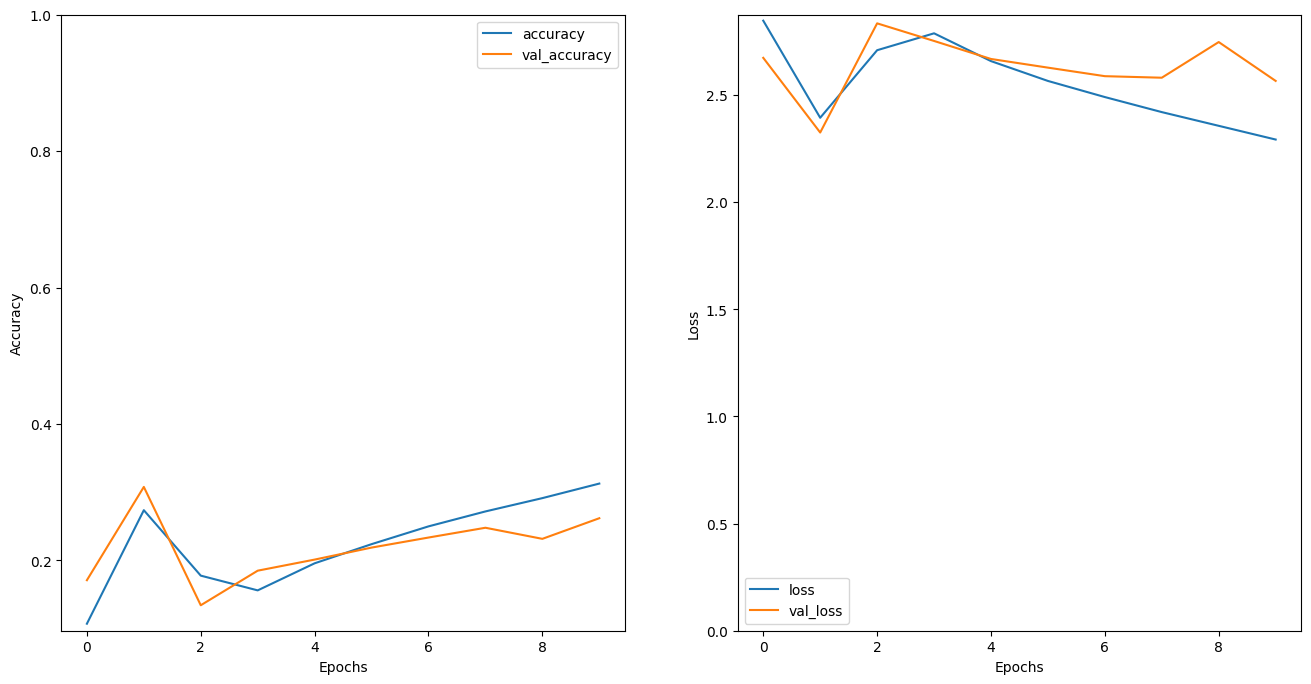

In [28]:
# plot accuracy and loss over epochs
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim(None,1)
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['loss', 'val_loss'])
plt.ylim(0,None)
plt.show()